## Data Preparation and Preprocessing

In [1]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from sklearn import preprocessing 

In [40]:
## Importing the dataset
df = pd.read_csv('Dataset.csv',header=0)

In [41]:
## print shape of dataset with rows and columns
print(df.shape)

(8077, 8)


In [42]:
df.sample(10)

,Year,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
5815,2011,DZ-BS,Black Soil,23.5,11.5,628.6,53.0,1955.0
4652,2019,DZ-BS,Black Soil,29.0,13.0,811.2,65.0,1130.0
65,2019,Chefe Donsa,Black Soil,27.0,15.0,811.2,45.0,330.0
2921,2018,Alemtena,Light Soil,25.5,13.0,543.8,67.0,3625.0
6515,2014,DZ-BS,Black Soil,31.0,16.0,559.8,40.0,2285.0
2781,2018,DZ-BS,Black Soil,24.5,10.5,543.8,37.0,2565.0
8015,2014,Alemtena,Light Soil,25.5,14.0,559.8,34.0,2250.0
5483,2019,DZ-BS,Black Soil,27.0,12.5,811.2,41.0,1340.0
560,2019,DZ-BS,Black Soil,31.0,13.0,811.2,46.0,890.0
2772,2018,DZ-BS,Black Soil,24.0,12.5,543.8,70.0,2360.0


In [43]:
print("The Dataset has %d rows and %d columns" % df.shape)

The Dataset has 8077 rows and 8 columns


### Data Cleaning: Handling Missing Values

In [44]:
print('The dataset has total of',df.isnull().sum().sum(),'Missing Values')

The dataset has total of 133 Missing Values


In [58]:
df.isnull().sum()

Year                0
Location            0
Soil Type           0
Max_Temperature    56
Min_Teperature     31
Rainfall            0
Humidity            4
Yield Kg/ha        42
dtype: int64

In [45]:
## Here we will check the percentage of null values present in each column
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Max_Temperature 0.0069  % missing values
Min_Teperature 0.0038  % missing values
Humidity 0.0005  % missing values
Yield Kg/ha 0.0052  % missing values


In [46]:
## Check the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8077 non-null   int64  
 1   Location         8077 non-null   object 
 2   Soil Type        8077 non-null   object 
 3   Max_Temperature  8021 non-null   float64
 4   Min_Teperature   8046 non-null   float64
 5   Rainfall         8077 non-null   float64
 6   Humidity         8073 non-null   float64
 7   Yield Kg/ha      8035 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 504.9+ KB


In [47]:
df.isnull().mean().sort_values(ascending=False)*100 

Max_Temperature    0.693327
Yield Kg/ha        0.519995
Min_Teperature     0.383806
Humidity           0.049523
Rainfall           0.000000
Soil Type          0.000000
Location           0.000000
Year               0.000000
dtype: float64

In [48]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Number of Missing Values', 1 : 'Percentage(%)'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Percentage(%)', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has a total of " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [49]:
missing_values_table(df)

The dataset has a total of 8 columns.
There are 4 columns that have missing values.


,Number of Missing Values,Percentage(%)
Max_Temperature,56,0.7
Yield Kg/ha,42,0.5
Min_Teperature,31,0.4
Humidity,4,0.0


In [64]:
# We handle the missing values of the Yield by using median()
df['Yield Kg/ha'].fillna(df['Yield Kg/ha'].median(), inplace=True)

In [73]:
# We handle the missing values of Min temperatureby using median()
df['Min_Teperature'].fillna(df['Min_Teperature'].median(), inplace=True)

In [75]:
# We handle the missing values of Max temperatureby using median()
df['Max_Temperature'].fillna(df['Max_Temperature'].median(), inplace=True)

In [74]:
df['Humidity'].fillna(df['Humidity'].median(), inplace=True)

In [76]:
# Let's check wether or not the missing values are replaced by the mode and median values
df.isnull().sum()

Year               0
Location           0
Soil Type          0
Max_Temperature    0
Min_Teperature     0
Rainfall           0
Humidity           0
Yield Kg/ha        0
dtype: int64

In [77]:
print(df.isnull().sum().sum(),"Missing value: All the missing values are handled")

0 Missing value: All the missing values are handled


In [91]:
df.describe()

,Year,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
count,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000
mean,2017.028352,27.208803,12.909967,646.018608,54.421072,1613.834344
std,2.187318,2.629935,1.762797,127.831451,13.686248,1125.276768
min,2011.000000,20.000000,1.500000,482.100000,18.000000,0.000000
25%,2015.000000,25.500000,12.000000,543.800000,45.000000,580.000000
50%,2018.000000,27.000000,13.000000,559.800000,54.000000,1500.000000
75%,2019.000000,29.500000,14.000000,811.200000,66.000000,2450.000000
max,2019.000000,32.500000,16.600000,811.200000,84.000000,5635.000000


In [78]:
# Shows the columns with their number of catagories each variable is having
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'catagories')

Year : 8 catagories
Location : 7 catagories
Soil Type : 2 catagories
Max_Temperature : 24 catagories
Min_Teperature : 23 catagories
Rainfall : 8 catagories
Humidity : 57 catagories
Yield Kg/ha : 2023 catagories


#### Numerical Variables

In [51]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].sample(5)

Number of numerical variables:  6


,Year,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
6544,2014,24.0,15.0,559.8,48.0,115.0
6458,2014,24.5,12.0,559.8,78.0,3420.0
3754,2017,27.0,14.0,612.0,46.0,1055.0
1837,2018,29.0,15.0,543.8,62.0,2064.0
7340,2014,25.5,12.5,559.8,72.0,3110.0


#### Categorical Variables

In [79]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Location', 'Soil Type']

In [80]:
for feature in categorical_features:
    print('{}: Number of categories are {}'.format(feature,len(df[feature].unique())))

Location: Number of categories are 7
Soil Type: Number of categories are 2


In [54]:
df_dict = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))

In [69]:
### The Location categorical list shows that some of the list are the same with different spelling so we need to fix that.

In [23]:
df_dict['Location']

,Location
0,Chefe Donsa
1,D-zeit (B-soil)
2,Akaki
3,D/ Z (B-S)
4,UDE
5,Minjar
6,DZ-LS
7,Alemtena
8,DZ-BS
9,UDS


In [22]:
df.Location.replace({'Chefe Donsa':'Chefe Donsa', 'D-zeit (B-soil)':'DZ-BS', 'Akaki':'Akaki','D/ Z (B-S)':'DZ-BS','UDE':'Denkaka',  
                    'Minjar':'Minjar','DZ-LS':'DZ-LS','Alemtena':'Alemtena','DZ-BS':'DZ-BS','UDS':'Denkaka','DZLS':'DZ-LS',
                    'Chefe':'Chefe Donsa','DZBS':'DZ-BS','AKAKI':'Akaki','CHAFE DONSA':'Chefe Donsa','Minjar station one':'Minjar',
                    'akaki':'Akaki'}, inplace=True)

In [55]:
## Shows all the unique lists found in Location Category
df_dict['Location']

,Location
0,Chefe Donsa
1,DZ-BS
2,Akaki
3,Denkaka
4,Minjar
5,DZ-LS
6,Alemtena


In [56]:
## Shows all the unique lists found in Soil Type Category
df_dict['Soil Type']

,Soil Type
0,Black Soil
1,Light Soil


In [ ]:
### Since Ensamble learning algorithms are not sensetive to outlier, we can leave that part

Text(0.5, 1.0, 'Yield vs Year')

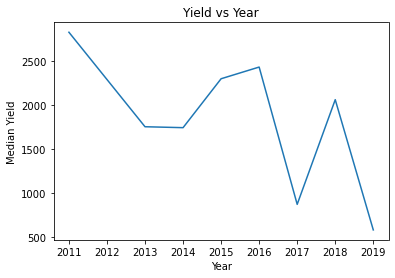

In [82]:
## Lets analyze and check the importance of year Variable to check whether there is a relation between year the Yield 
df.groupby('Year')['Yield Kg/ha'].median().plot()
plt.xlabel('Year')
plt.ylabel('Median Yield')
plt.title("Yield vs Year")

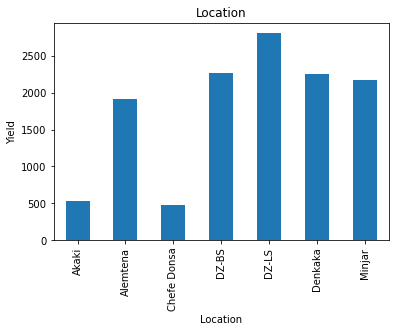

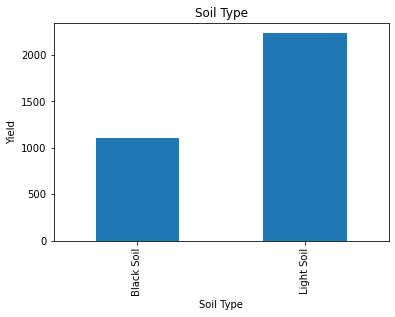

In [90]:
# Shows the relationship of the categorical avriables with respect to Yield.
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Yield Kg/ha'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.title(feature)
    plt.show()

In [92]:
# year variable will not have much impact on the future yield prediction, so we remove it

df=df.drop(['Year'],axis=1)

In [93]:
df.sample(3)


,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
1206,Akaki,Black Soil,26.0,11.5,811.2,56.0,120.0
707,Chefe Donsa,Black Soil,31.0,13.0,811.2,72.0,190.0
958,DZ-BS,Black Soil,27.5,12.0,811.2,68.0,1410.0


### Data Transformation: Changing categorical features to Numeric

In [95]:
# we apply one hot encoding to convert the categorical value to numerical values(0,1)
df=pd.get_dummies(df,drop_first=True)
df.head()

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha,Location_Alemtena,Location_Chefe Donsa,Location_DZ-BS,Location_DZ-LS,Location_Denkaka,Location_Minjar,Soil Type_Light Soil
0,31.0,13.0,811.2,68.0,980.0,0,1,0,0,0,0,0
1,30.5,16.0,811.2,72.0,670.0,0,1,0,0,0,0,0
2,29.5,14.0,811.2,68.0,730.0,0,1,0,0,0,0,0
3,30.0,13.0,811.2,54.0,710.0,0,1,0,0,0,0,0
4,31.0,12.0,811.2,70.0,780.0,0,1,0,0,0,0,0


In [96]:
# Correlation: How one feature is correlated with other features
df.corr()

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha,Location_Alemtena,Location_Chefe Donsa,Location_DZ-BS,Location_DZ-LS,Location_Denkaka,Location_Minjar,Soil Type_Light Soil
Max_Temperature,1.000000,0.005334,0.033056,-0.016499,-0.004569,0.002840,0.009315,0.026259,0.024934,-0.079460,-0.020282,0.006353
Min_Teperature,0.005334,1.000000,0.008620,-0.017161,-0.010885,0.030871,-0.023064,0.009362,-0.020236,-0.005249,-0.060847,-0.025013
Rainfall,0.033056,0.008620,1.000000,0.009691,-0.423703,-0.207958,0.247100,0.115364,-0.241628,-0.150082,-0.217573,-0.418370
Humidity,-0.016499,-0.017161,0.009691,1.000000,-0.038021,0.027747,0.038715,-0.133649,-0.044352,-0.007308,0.087404,0.040680
Yield Kg/ha,-0.004569,-0.010885,-0.423703,-0.038021,1.000000,0.092168,-0.438920,0.361078,0.329034,0.120243,0.110255,0.332092
Location_Alemtena,0.002840,0.030871,-0.207958,0.027747,0.092168,1.000000,-0.184854,-0.223915,-0.093761,-0.060708,-0.081797,0.599022
Location_Chefe Donsa,0.009315,-0.023064,0.247100,0.038715,-0.438920,-0.184854,1.000000,-0.383952,-0.160775,-0.104098,-0.140260,-0.308593
Location_DZ-BS,0.026259,0.009362,0.115364,-0.133649,0.361078,-0.223915,-0.383952,1.000000,-0.194747,-0.126094,-0.169897,-0.373801
Location_DZ-LS,0.024934,-0.020236,-0.241628,-0.044352,0.329034,-0.093761,-0.160775,-0.194747,1.000000,-0.052800,-0.071142,0.519880
Location_Denkaka,-0.079460,-0.005249,-0.150082,-0.007308,0.120243,-0.060708,-0.104098,-0.126094,-0.052800,1.000000,-0.046063,-0.101346


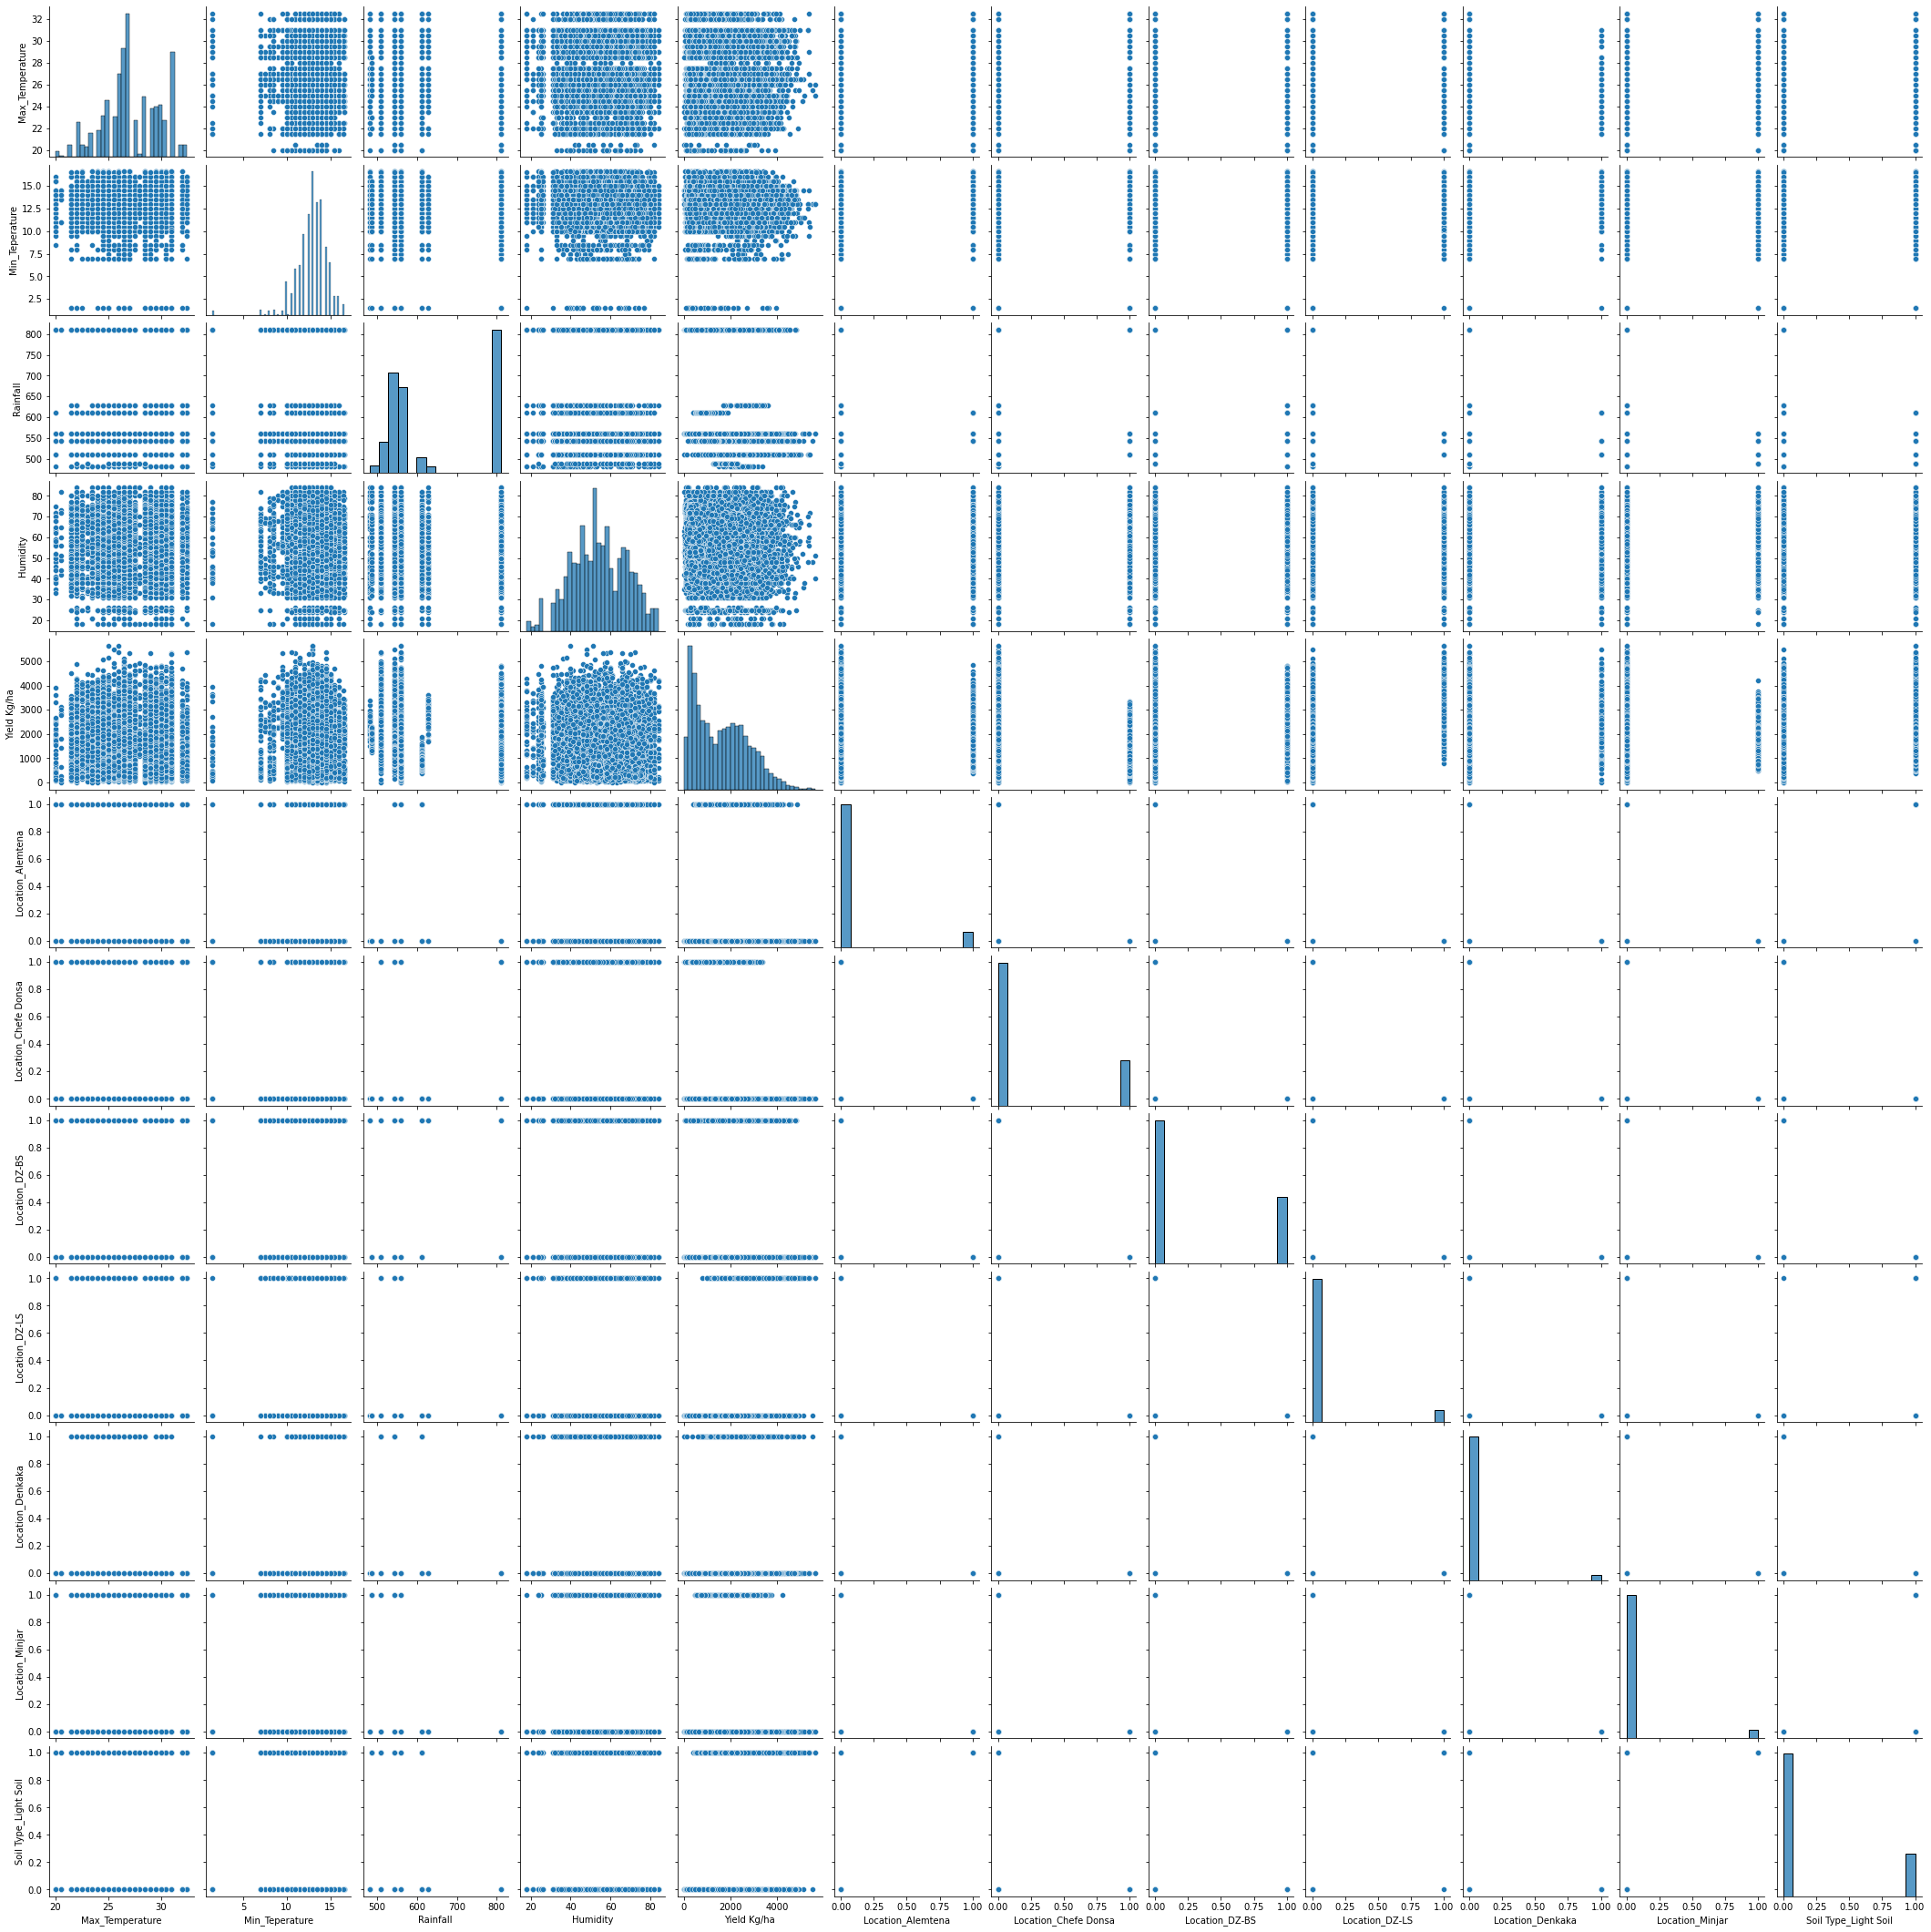

In [97]:
import seaborn as sns
sns.pairplot(df)

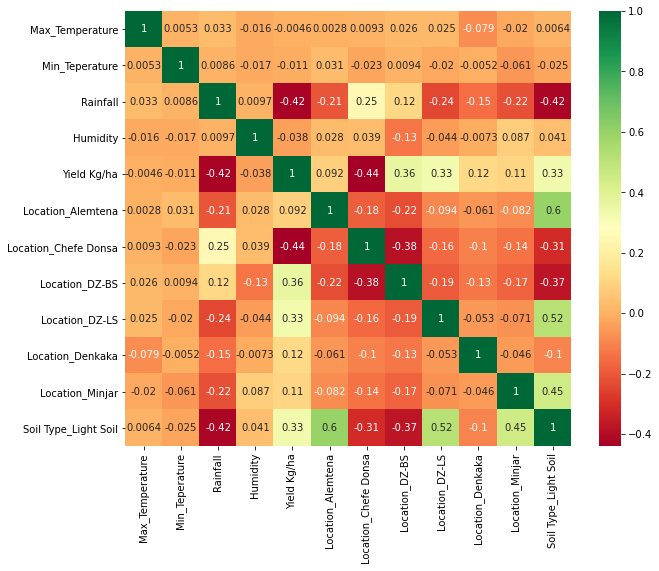

In [100]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

** From The above hitmap we can conclude that there is no multicollinearity in the features. So that we can take all the faetures for building the model **

In [101]:
# Let's generate the preprocessed csv file 
data.to_csv('cleaned.csv',index=False)